In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [58]:
df = pd.read_csv("water.csv").iloc[: , 1:]

In [59]:
df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


# Задание 1

<Axes: xlabel='mortality', ylabel='hardness'>

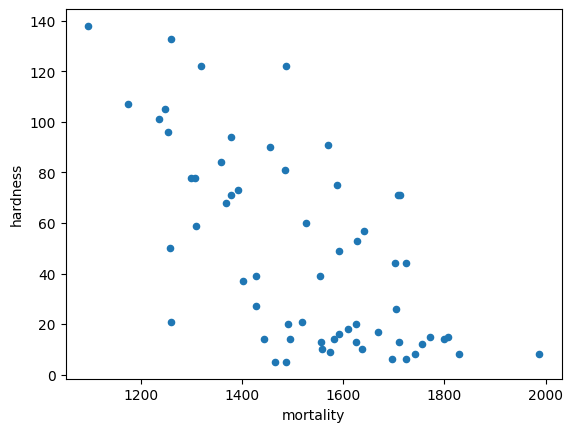

In [60]:
# визуализируем взаимосвязь жесткости и смертности
df.plot(kind='scatter', x='mortality', y='hardness')

In [61]:
# считаем коэф. корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [62]:
# считаем коэф. корреляции Спирмана
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [63]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [64]:
X = df[['hardness']]
y = df['mortality']

			
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу


model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           7.83e-06
Time:                        23:12:06   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [65]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912278


(array([1., 0., 1., 0., 2., 5., 3., 2., 5., 3., 2., 2., 5., 3., 2., 4., 0.,
        1., 0., 1.]),
 array([-3.43207209e+02, -3.08892795e+02, -2.74578382e+02, -2.40263968e+02,
        -2.05949554e+02, -1.71635140e+02, -1.37320726e+02, -1.03006312e+02,
        -6.86918979e+01, -3.43774840e+01, -6.30700817e-02,  3.42513439e+01,
         6.85657578e+01,  1.02880172e+02,  1.37194586e+02,  1.71509000e+02,
         2.05823414e+02,  2.40137827e+02,  2.74452241e+02,  3.08766655e+02,
         3.43081069e+02]),
 <BarContainer object of 20 artists>)

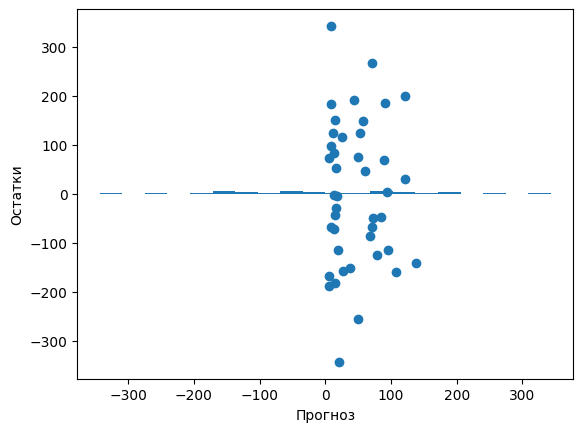

In [66]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')


plt.hist(results.resid, bins=20)

(array([1., 0., 1., 0., 2., 5., 3., 2., 5., 3., 2., 2., 5., 3., 2., 4., 0.,
        1., 0., 1.]),
 array([-3.43207209e+02, -3.08892795e+02, -2.74578382e+02, -2.40263968e+02,
        -2.05949554e+02, -1.71635140e+02, -1.37320726e+02, -1.03006312e+02,
        -6.86918979e+01, -3.43774840e+01, -6.30700817e-02,  3.42513439e+01,
         6.85657578e+01,  1.02880172e+02,  1.37194586e+02,  1.71509000e+02,
         2.05823414e+02,  2.40137827e+02,  2.74452241e+02,  3.08766655e+02,
         3.43081069e+02]),
 <BarContainer object of 20 artists>)

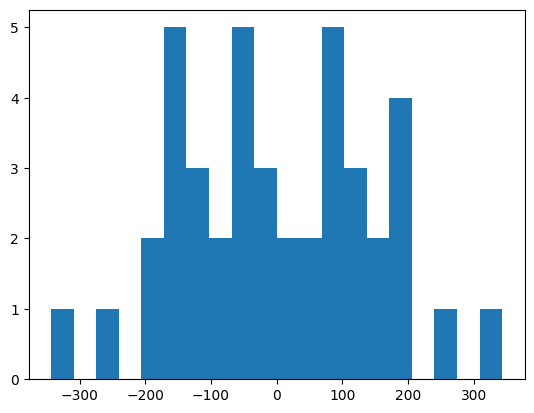

In [67]:
plt.hist(results.resid, bins=20)

# Задание 2 (1 группа)

In [68]:
df1 = df[df["location"] == 'South']
X = df1[['hardness']]
y = df1['mortality']


<Axes: xlabel='mortality', ylabel='hardness'>

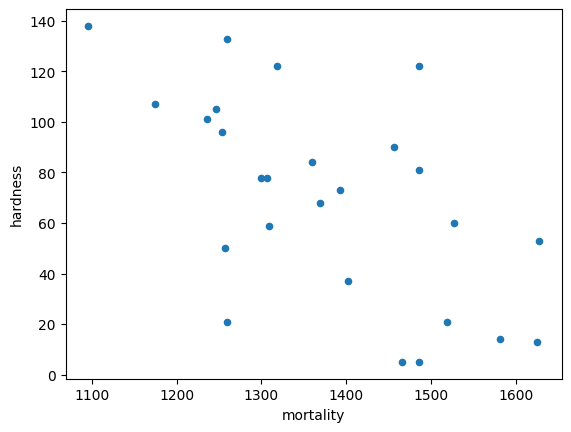

In [69]:
# визуализируем взаимосвязь жесткости и смертности
df1.plot(kind='scatter', x='mortality', y='hardness')

In [70]:
# считаем коэф. корреляции Пирсона
df1[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [71]:
# считаем коэф. корреляции Спирмана
df1[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [72]:

			
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу


model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           7.30e-05
Time:                        23:12:08   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54.471     30.112      0.0

c:\Users\Mi\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [73]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1640.220460
hardness      -3.513429
dtype: float64
R2:  0.6363808308877189


(array([1., 0., 0., 0., 0., 0., 1., 3., 3., 1., 1., 2., 1., 0., 0., 1., 1.,
        2., 0., 1.]),
 array([-207.54899972, -188.52198534, -169.49497096, -150.46795658,
        -131.4409422 , -112.41392781,  -93.38691343,  -74.35989905,
         -55.33288467,  -36.30587029,  -17.2788559 ,    1.74815848,
          20.77517286,   39.80218724,   58.82920162,   77.856216  ,
          96.88323039,  115.91024477,  134.93725915,  153.96427353,
         172.99128791]),
 <BarContainer object of 20 artists>)

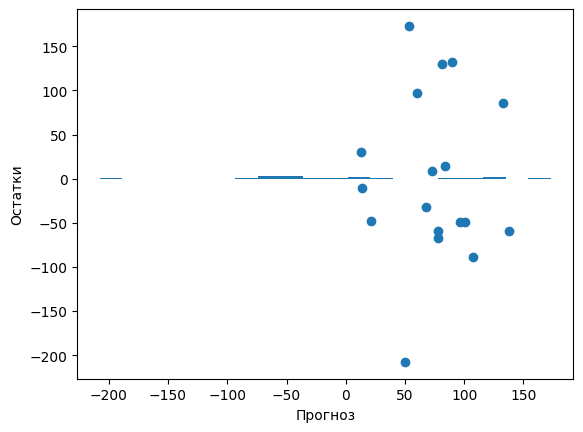

In [74]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')


plt.hist(results.resid, bins=20)

(array([1., 0., 0., 0., 0., 0., 1., 3., 3., 1., 1., 2., 1., 0., 0., 1., 1.,
        2., 0., 1.]),
 array([-207.54899972, -188.52198534, -169.49497096, -150.46795658,
        -131.4409422 , -112.41392781,  -93.38691343,  -74.35989905,
         -55.33288467,  -36.30587029,  -17.2788559 ,    1.74815848,
          20.77517286,   39.80218724,   58.82920162,   77.856216  ,
          96.88323039,  115.91024477,  134.93725915,  153.96427353,
         172.99128791]),
 <BarContainer object of 20 artists>)

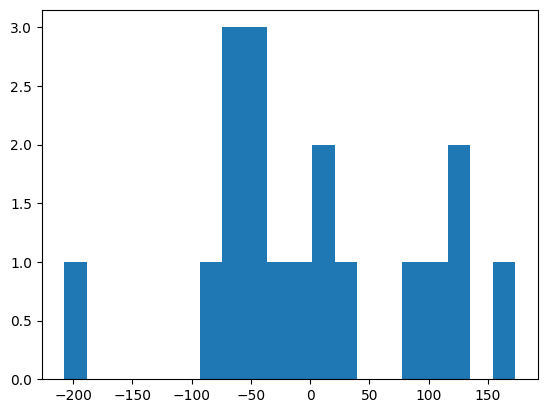

In [75]:
plt.hist(results.resid, bins=20)

# Задание 2 (2 группа)

In [76]:
df2 = df[df["location"] == 'North']
X = df2[['hardness']]
y = df2['mortality']


<Axes: xlabel='mortality', ylabel='hardness'>

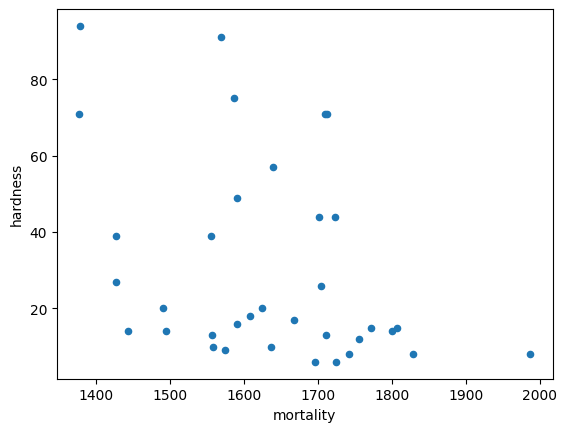

In [77]:
# визуализируем взаимосвязь жесткости и смертности
df2.plot(kind='scatter', x='mortality', y='hardness')

In [78]:
# считаем коэф. корреляции Пирсона
df2[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [79]:
# считаем коэф. корреляции Спирмана
df2[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [80]:

			
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу


model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Thu, 23 Nov 2023   Prob (F-statistic):             0.0316
Time:                        23:12:10   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

In [81]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1688.150229
hardness      -1.976862
dtype: float64
R2:  0.19322282610033503


(array([1., 0., 3., 0., 1., 2., 0., 0., 1., 2., 0., 2., 1., 2., 3., 0., 1.,
        1., 1., 3.]),
 array([-207.77494801, -189.32585104, -170.87675407, -152.42765709,
        -133.97856012, -115.52946315,  -97.08036618,  -78.6312692 ,
         -60.18217223,  -41.73307526,  -23.28397829,   -4.83488132,
          13.61421566,   32.06331263,   50.5124096 ,   68.96150657,
          87.41060354,  105.85970052,  124.30879749,  142.75789446,
         161.20699143]),
 <BarContainer object of 20 artists>)

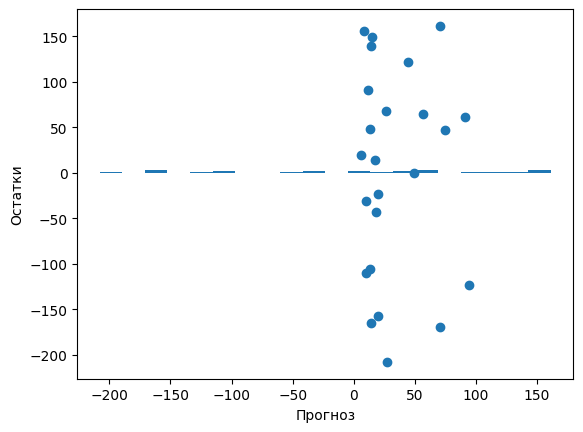

In [82]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')


plt.hist(results.resid, bins=20)

(array([1., 0., 3., 0., 1., 2., 0., 0., 1., 2., 0., 2., 1., 2., 3., 0., 1.,
        1., 1., 3.]),
 array([-207.77494801, -189.32585104, -170.87675407, -152.42765709,
        -133.97856012, -115.52946315,  -97.08036618,  -78.6312692 ,
         -60.18217223,  -41.73307526,  -23.28397829,   -4.83488132,
          13.61421566,   32.06331263,   50.5124096 ,   68.96150657,
          87.41060354,  105.85970052,  124.30879749,  142.75789446,
         161.20699143]),
 <BarContainer object of 20 artists>)

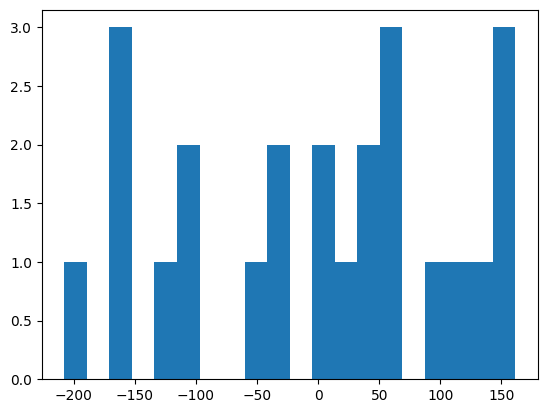

In [83]:
plt.hist(results.resid, bins=20)